## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Giovanni Rosati (Part-time pacing)

Instructor: Jeff Herman

Blog URL: 


# Module 3 Final Project



Citation requested:

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.

Dataset link: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

In [100]:
# needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm

# from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy import stats

# np.random.seed(0) # for reproducibility
%matplotlib inline

In [101]:
# added this cell to look at the data before converting ? values to NaN using na_values="?"
# df_test = pd.read_csv('risk_factors_cervical_cancer.csv')

# for column in df_test.columns:
#     print('Unique values and count in {}'.format(column))
#     print(pd.value_counts(df_test[column].values))

In [102]:
# load the dataset as a Pandas dataframe
df_import = pd.read_csv('risk_factors_cervical_cancer.csv', na_values="?")

In [103]:
df_import.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [104]:
for column in df_import.columns:
    print('Unique values and count in {}'.format(column))
    print(pd.value_counts(df_import[column].values))

Unique values and count in Age
23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
30    35
17    35
29    33
27    33
22    30
35    29
33    28
31    27
36    24
34    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
45     6
44     6
42     6
43     5
14     5
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
dtype: int64
Unique values and count in Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
dtype: int64
Unique values and count in First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
22.0      9
23.0      9
26.0      7
27.0      6
24.0      6
12.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10.0      2
32.0      1
dtype: int64
Unique values and count in Num of

In [105]:
for column in df_import.columns:
    print(column)

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
STDs: Time since first diagnosis
STDs: Time since last diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy


In [106]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [107]:
df_import.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [108]:
for column in df_import.columns:
    print('Unique values in {}'.format(column))
    values_list = df_import[column].unique()
    values_list.sort()
    print (values_list)
        

Unique values in Age
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 59 70 79 84]
Unique values in Number of sexual partners
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 15. 28. nan]
Unique values in First sexual intercourse
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 32. nan]
Unique values in Num of pregnancies
[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. nan]
Unique values in Smokes
[ 0.  1. nan]
Unique values in Smokes (years)
[ 0.          0.16        0.5         1.          1.26697291  2.
  3.          4.          5.          6.          7.          8.
  9.         10.         11.         12.         13.         14.
 15.         16.         18.         19.         20.         21.
 22.         24.         28.         32.         34.         37.
         nan]
Unique values in Smokes (packs/year)
[0.00000000e+00 1.00000000e-03 3.00000000e-03 2.50000000e-02
 4.00000000e-02 5.000

In [109]:
# copy the import to a new dataframe
df = df_import

In [110]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

# NEED TO REDO THIS

Many of the factors have missing values,

I plan to create new factors so that the information contained between those records with a value and without is not lost. 

Smokes, Hormonal Contraceptives, IUD, and STDs are all boolean factors with missing values. I will change these factors to categorical factors with three values: True, False, Unknown.

For factors that are ordinal (Number of sexual partners, First sexual intercourse, Num of pregnancies) I will create an new boolean factor to identify which records had a value from those that did not, and then replace the missing values with the mean from that factor.



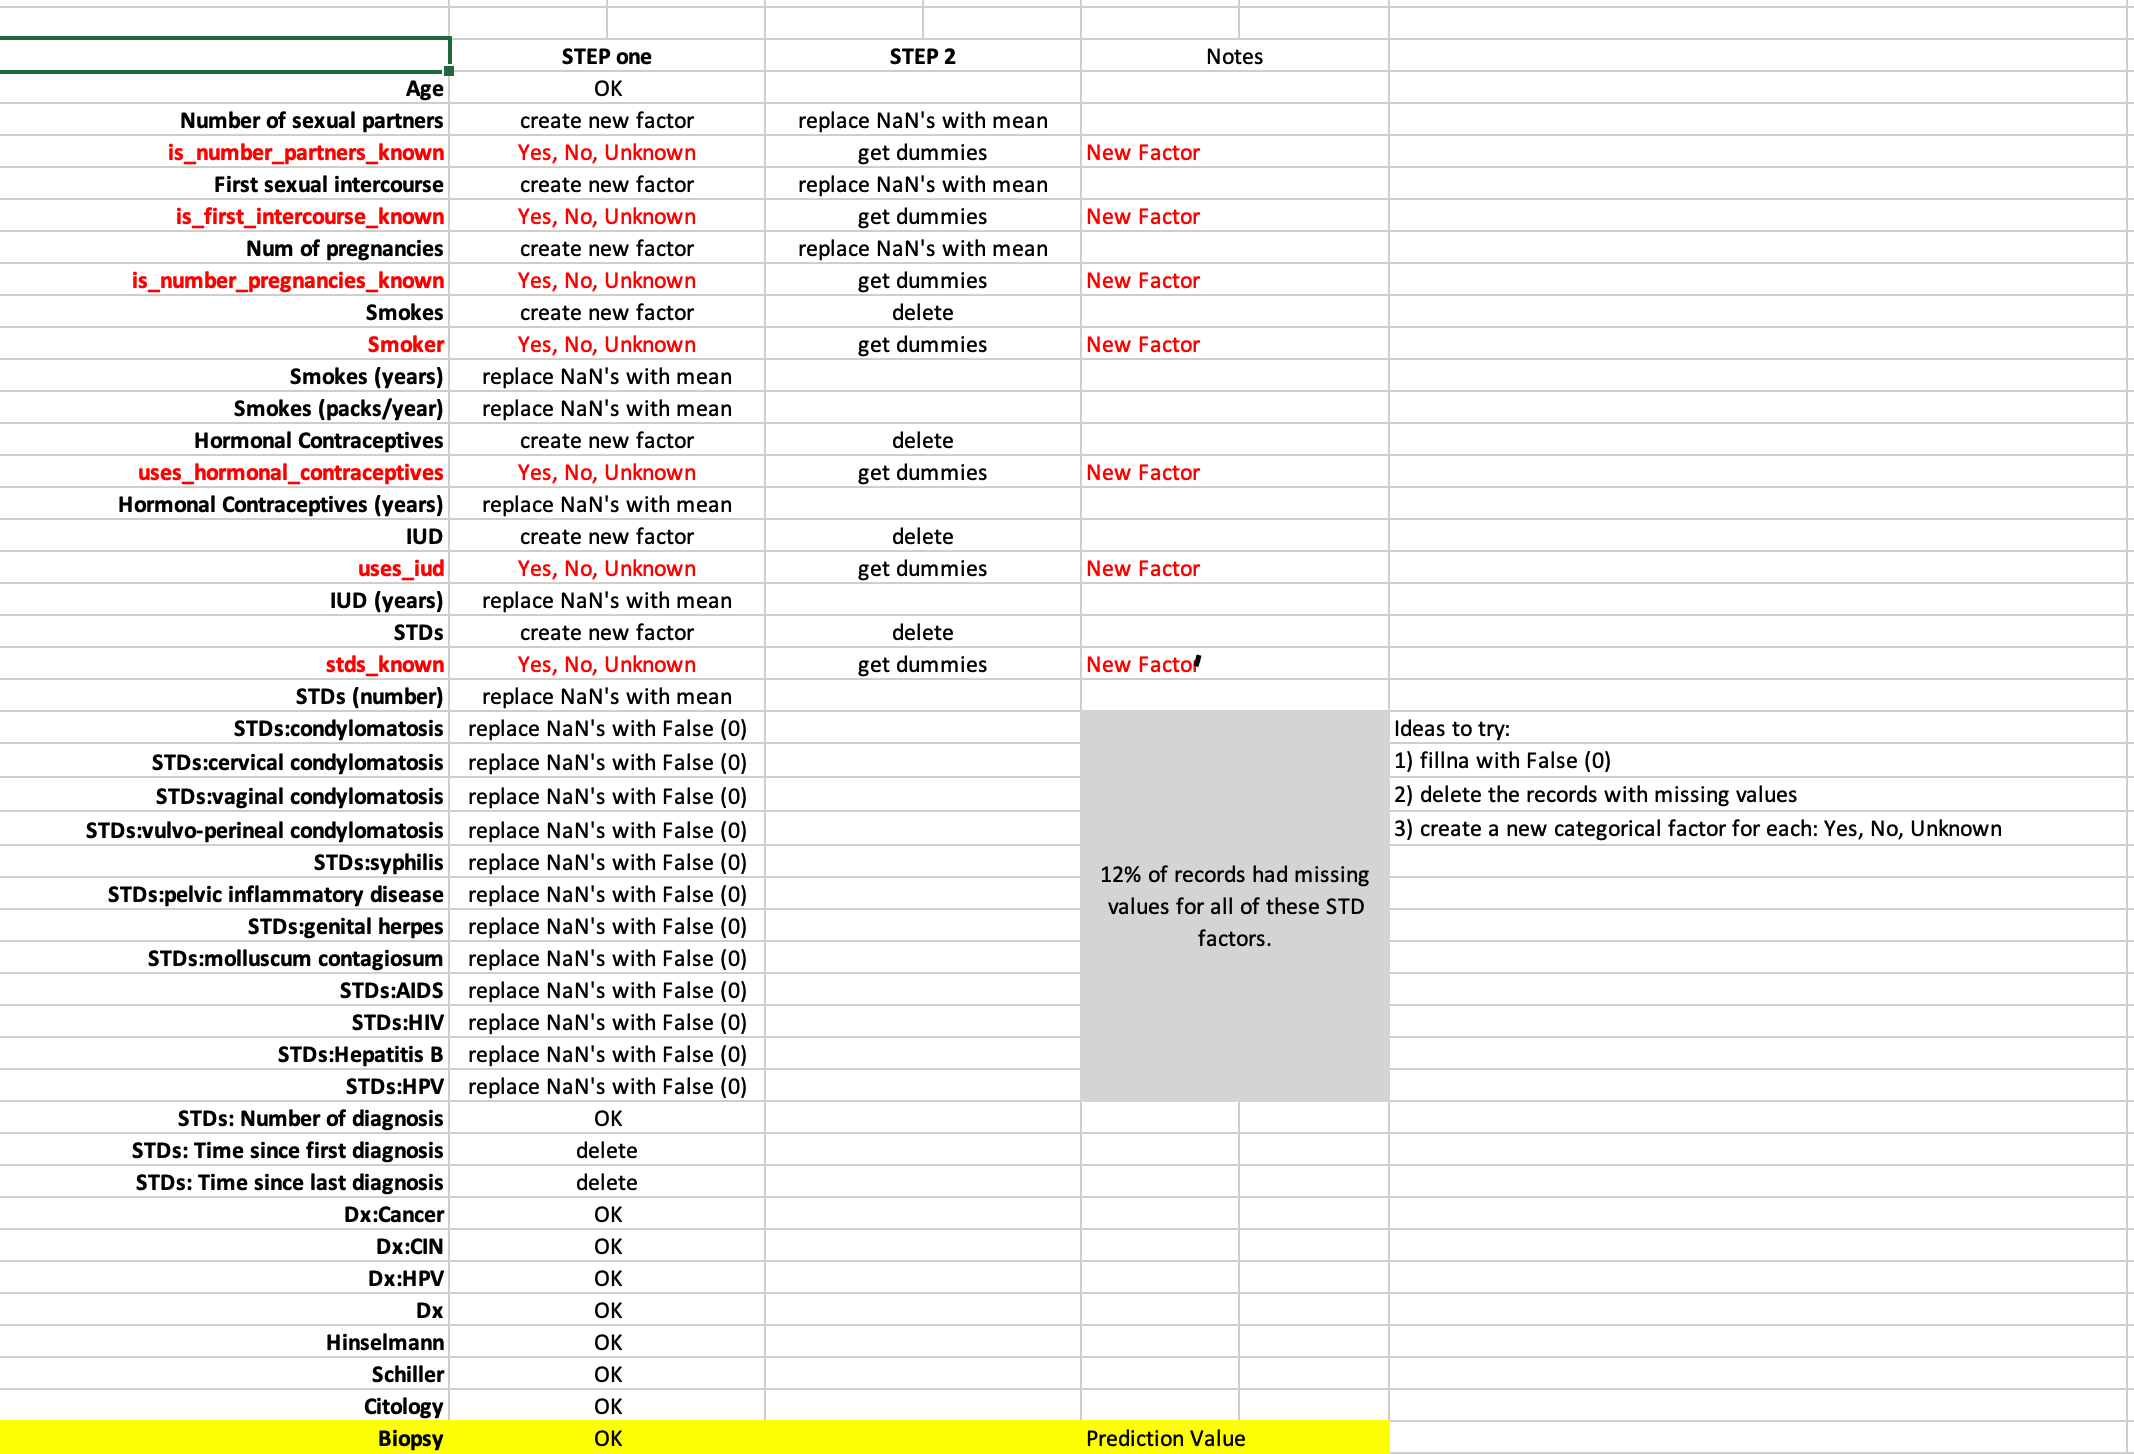

In [111]:
# function to create a new boolean column in a df,
# given a column with int, float, and/or numpy.nan values.

def new_bool(df, col_name):
    bool_list = []
    for index, row in df.iterrows():
#         print(row)
        value = row[col_name]
#         print(value)
        value_out = np.True_
        if pd.isna(value):
            value_out = np.False_
            
#       for testing
#         print("value: {}   -   bool: {}".format(value, str(value_out)))

        bool_list.append(value_out)

    return bool_list

#       for testing
#         print("value: {}   -   bool: {}".format(value, str(row[new_col_name])))


In [112]:
# create new factor 'is_number_partners_known'
df['is_number_partners_known'] = new_bool(df, 'Number of sexual partners')

In [113]:
# check if operation was successful
df['is_number_partners_known'].value_counts()

True     832
False     26
Name: is_number_partners_known, dtype: int64

In [114]:
# create new factor 'is_first_intercourse_known'
df['is_first_intercourse_known'] = new_bool(df, 'First sexual intercourse')

In [115]:
# check if operation was successful
df['is_first_intercourse_known'].value_counts()

True     851
False      7
Name: is_first_intercourse_known, dtype: int64

In [116]:
# create new factor 'is_number_pregnancies_known'
df['is_number_pregnancies_known'] = new_bool(df, 'Num of pregnancies')

In [117]:
# check if operation was successful
df['is_number_pregnancies_known'].value_counts()

True     802
False     56
Name: is_number_pregnancies_known, dtype: int64

In [118]:
# function to replace boolean factors that have missing values with a categorical factor with three values:
# Yes, No, Unknown

def new_categorical(df, col_name):
    values_list = []
    for index, row in df.iterrows():
        value = row[col_name]
        
#         print('original value: {}'.format(value))
        if pd.isna(value):
            value = "Unknown"
        elif value == 1.0:
            value = "Yes"
        else:
            value = "No"
        
#         print('new value: {}'.format(value))
        values_list.append(value)
    
    return values_list


In [119]:
# replaced these with get_dummies(dummy_na=True)

# # create new factor 'is_number_pregnancies_known'
# df['smoker'] = new_categorical(df, 'Smokes')

# # check if operation was successful
# df['smoker'].value_counts()

In [120]:
# # create new factor 'uses_hormonal_contraceptives'
# df['uses_hormonal_contraceptives'] = new_categorical(df, 'Hormonal Contraceptives')

# # check if operation was successful
# df['uses_hormonal_contraceptives'].value_counts()


In [121]:
# # create new factor 'uses_iud'
# df['uses_iud'] = new_categorical(df, 'IUD')

# # check if operation was successful
# df['uses_iud'].value_counts()


In [122]:
# # create new factor 'stds_known'
# df['stds_known'] = new_categorical(df, 'STDs')

# # check if operation was successful
# df['stds_known'].value_counts()



* replace NaN's with mean:
    * Number of sexual partners
    * First sexual intercourse
    * Num of pregnancies
    * Smokes (years)
    * Smokes (packs/year)
    * Hormonal Contraceptives (years)
    * IUD (years)
    * STDs (number)
      
* replace NaN's with zero:  -  change this to make new categorical factors
    * STDs:condylomatosis
    * STDs:cervical condylomatosis
    * STDs:vaginal condylomatosis
    * STDs:vulvo-perineal condylomatosis
    * STDs:syphilis
    * STDs:pelvic inflammatory disease
    * STDs:genital herpes
    * STDs:molluscum contagiosum
    * STDs:AIDS
    * STDs:HIV
    * STDs:Hepatitis B
    * STDs:HPV
    
* Drop columns:
    * Smokes
    * Hormonal Contraceptives
    * IUD
    * STDs
    * STDs: Time since first diagnosis
    * STDs: Time since last diagnosis
    
* get dummies for categorical factors:
    * is_number_partners_known
    * is_first_intercourse_known
    * is_number_pregnancies_known
    * smoker
    * uses_hormonal_contraceptives
    * uses_iud
    * stds_known
    

In [164]:
df2 = df

In [165]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy', 'is_number_partners_known',
       'is_first_intercourse_known', 'is_number_pregnancies_known'],
      dtype='object')

In [166]:
df2.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy', 'is_number_partners_known',
       'is_first_intercourse_known', 'is_number_pregnancies_known'],
      dtype='object')

In [167]:
# df2 = df.drop(['Smokes',
#              'Hormonal Contraceptives',
#              'IUD',
#              'STDs',
#              'STDs: Time since first diagnosis',
#              'STDs: Time since last diagnosis'], axis=1)

In [168]:
# df2.isna().sum()

In [169]:
# df2.describe()

In [170]:
# replace continious factors missing values with the mean for each factor 
col_list = ['Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)']


for col in col_list:
    df2[col].fillna(df2[column].mean(), inplace=True)

In [171]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,845.000000,858.000000,858.000000,750.000000,858.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.452991,16.857166,2.131223,0.145562,1.202212,0.447249,0.641333,1.980463,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.695755,3.180723,1.502272,0.352876,4.060342,2.210169,0.479929,3.593520,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.064103,0.064103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
df2.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                             0
STDs                                  105
STDs (number)                           0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [173]:
df2.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1, inplace=True)


KeyError: "['STDs: Time since first diagnosis' 'STDs: Time since last diagnosis'] not found in axis"

In [175]:
df2.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                             0
STDs                                  105
STDs (number)                           0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [176]:
# make a list of the individual std boolean factors
col_list = ['STDs:condylomatosis',
            'STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis',
            'STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis',
            'STDs:pelvic inflammatory disease',
            'STDs:genital herpes',
            'STDs:molluscum contagiosum',
            'STDs:AIDS',
            'STDs:HIV',
            'STDs:Hepatitis B',
            'STDs:HPV']

In [177]:
# Revised this - because there were values with zero and values with no data, decided to use get_dimmies
# with the kwarg that creates a column for records that have no value
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html


# drop two factors that have no information
# df2.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1, inplace=True)

In [178]:
# same revision as cell above

# replace missing values in boolean factors with 0 (False)


    
# for col in col_list:
#     df2[col].fillna(0, inplace=True)

In [179]:
# replaced with the cell below

# col_list = ['is_number_partners_known',
#             'is_first_intercourse_known',
#             'is_number_pregnancies_known',
#             'smoker',
#             'uses_hormonal_contraceptives',
#             'uses_iud',
#             'stds_known',
#             'Dx:Cancer',
#             'Dx:CIN',
#             'Dx:HPV',
#             'Dx',
#             'Hinselmann',
#             'Schiller',
#             'Citology']

# for col in col_list:
#     df2[col] = 

In [180]:
# original version
# df2 = pd.get_dummies(
#     data=df2, dummy_na=True, columns=['is_number_partners_known',
#                        'is_first_intercourse_known',
#                        'is_number_pregnancies_known',
#                        'smoker',
#                        'uses_hormonal_contraceptives',
#                        'uses_iud',
#                        'stds_known',
#                        'Dx:Cancer',
#                        'Dx:CIN',
#                        'Dx:HPV',
#                        'Dx',
#                        'Hinselmann',
#                        'Schiller',
#                        'Citology',
#                        'STDs:condylomatosis',
#                        'STDs:cervical condylomatosis',
#                        'STDs:vaginal condylomatosis',
#                        'STDs:vulvo-perineal condylomatosis',
#                        'STDs:syphilis',
#                        'STDs:pelvic inflammatory disease',
#                        'STDs:genital herpes',
#                        'STDs:molluscum contagiosum',
#                        'STDs:AIDS',
#                        'STDs:HIV',
#                        'STDs:Hepatitis B', 
#                        'STDs:HPV'])

In [181]:
df2 = pd.get_dummies(
    data=df2, 
    dummy_na=True, 
    columns=['is_number_partners_known',
             'is_first_intercourse_known',
             'is_number_pregnancies_known',
             'Smokes',
             'Hormonal Contraceptives',
             'IUD',
             'STDs',
             'Dx:Cancer',
             'Dx:CIN',
             'Dx:HPV',
             'Dx',
             'Hinselmann',
             'Schiller',
             'Citology',
             'STDs:condylomatosis',
             'STDs:cervical condylomatosis',
             'STDs:vaginal condylomatosis',
             'STDs:vulvo-perineal condylomatosis',
             'STDs:syphilis',
             'STDs:pelvic inflammatory disease',
             'STDs:genital herpes',
             'STDs:molluscum contagiosum',
             'STDs:AIDS',
             'STDs:HIV',
             'STDs:Hepatitis B', 
             'STDs:HPV',
             'Dx:Cancer',
             'Dx:CIN',
             'Dx:HPV',
             'Dx',
             'Hinselmann',
             'Schiller',
             'Citology'])

In [182]:
df2.isna().sum()

Age                                  0
Number of sexual partners            0
First sexual intercourse             0
Num of pregnancies                   0
Smokes (years)                       0
Smokes (packs/year)                  0
Hormonal Contraceptives (years)      0
IUD (years)                          0
STDs (number)                        0
STDs: Number of diagnosis            0
Biopsy                               0
is_number_partners_known_False       0
is_number_partners_known_True        0
is_number_partners_known_nan         0
is_first_intercourse_known_False     0
is_first_intercourse_known_True      0
is_first_intercourse_known_nan       0
is_number_pregnancies_known_False    0
is_number_pregnancies_known_True     0
is_number_pregnancies_known_nan      0
Smokes_0.0                           0
Smokes_1.0                           0
Smokes_nan                           0
Hormonal Contraceptives_0.0          0
Hormonal Contraceptives_1.0          0
Hormonal Contraceptives_n

In [183]:
for col in df2.columns:
    print(col)

Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives (years)
IUD (years)
STDs (number)
STDs: Number of diagnosis
Biopsy
is_number_partners_known_False
is_number_partners_known_True
is_number_partners_known_nan
is_first_intercourse_known_False
is_first_intercourse_known_True
is_first_intercourse_known_nan
is_number_pregnancies_known_False
is_number_pregnancies_known_True
is_number_pregnancies_known_nan
Smokes_0.0
Smokes_1.0
Smokes_nan
Hormonal Contraceptives_0.0
Hormonal Contraceptives_1.0
Hormonal Contraceptives_nan
IUD_0.0
IUD_1.0
IUD_nan
STDs_0.0
STDs_1.0
STDs_nan
Dx:Cancer_0.0
Dx:Cancer_1.0
Dx:Cancer_nan
Dx:CIN_0.0
Dx:CIN_1.0
Dx:CIN_nan
Dx:HPV_0.0
Dx:HPV_1.0
Dx:HPV_nan
Dx_0.0
Dx_1.0
Dx_nan
Hinselmann_0.0
Hinselmann_1.0
Hinselmann_nan
Schiller_0.0
Schiller_1.0
Schiller_nan
Citology_0.0
Citology_1.0
Citology_nan
STDs:condylomatosis_0.0
STDs:condylomatosis_1.0
STDs:condylomatosis_nan
STDs:cervical condyloma

This created columns that have no information - for categorical factors (bools too) that did not 
have any NaN, a NaN factor was created anyway:

* is_number_partners_known_nan
* is_first_intercourse_known_nan
* is_number_pregnancies_known_nan
* Dx_Cancer_nan
* Dx_CIN_nan
* Dx_HPV_nan
* Dx_nan
* Hinselmann_nan
* Schiller_nan
* Citology_nan

These columns could be deleted.

In [184]:
col_list = ['is_number_partners_known_nan',
            'is_first_intercourse_known_nan',
            'is_number_pregnancies_known_nan',
            'Dx:Cancer_nan',
            'Dx:CIN_nan',
            'Dx:HPV_nan',
            'Dx_nan',
            'Hinselmann_nan',
            'Schiller_nan',
            'Citology_nan']

for col in col_list:
    df2.drop([col], axis=1, inplace=True)

In [187]:
df2['STDs:cervical condylomatosis_nan'].value_counts()

0    753
1    105
Name: STDs:cervical condylomatosis_nan, dtype: int64

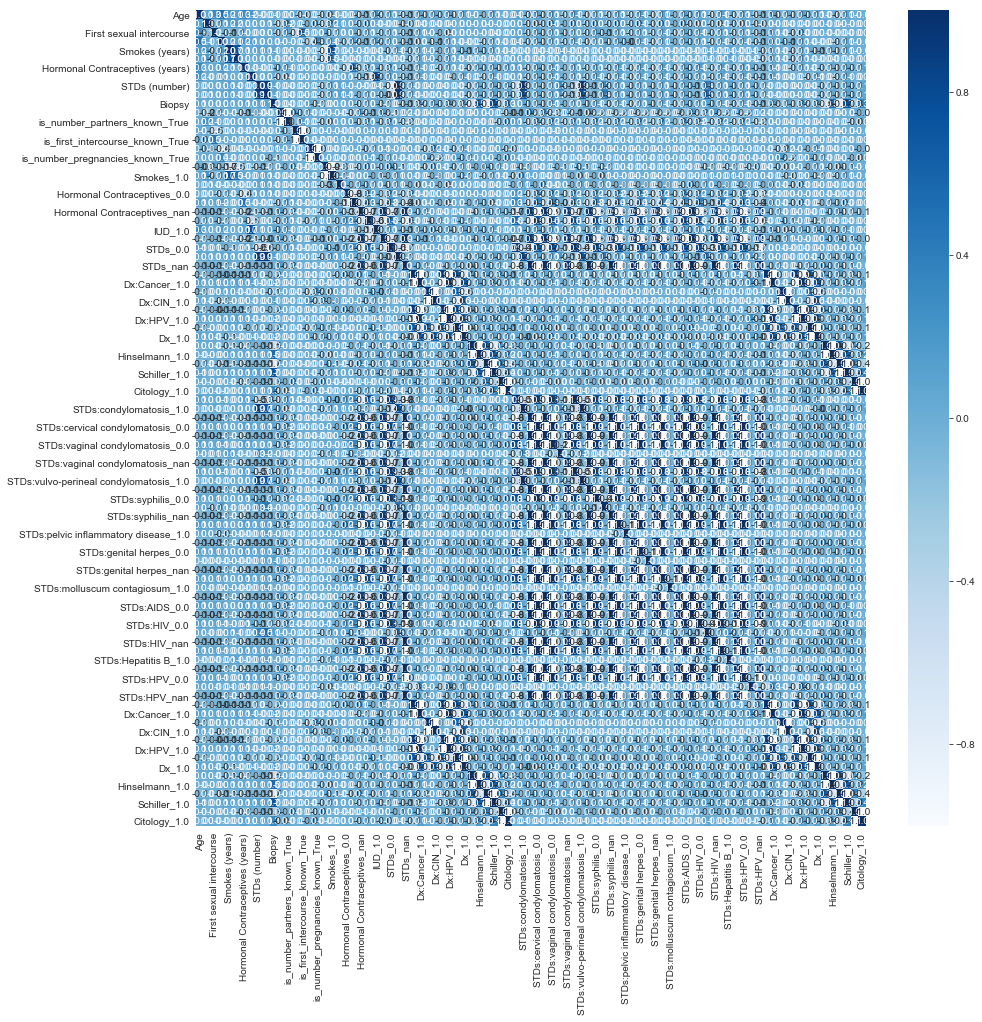

In [188]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.loc[:,:].corr(), annot=True, cmap="Blues", fmt='.1f')
plt.show()

Two factors appear to have no information, ie. all values are the same for the factor.

In [189]:
# make a copy of df2
df_backup = df2

In [190]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,Dx:HPV_0.0,Dx:HPV_1.0,Dx_0.0,Dx_1.0,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.452991,16.857166,2.131223,1.202212,0.447249,1.980463,0.453345,0.162856,0.087413,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.913753,0.086247,0.948718,0.051282
std,8.497948,1.695755,3.180723,1.502272,4.060342,2.210169,3.593520,1.812206,0.527732,0.302545,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.280892,0.280892,0.220701,0.220701
min,13.000000,0.064103,0.064103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
# look at the distribution of the continuous factors
continuous_cols = ['Age',
            'Number of sexual partners',
            'First sexual intercourse',
            'Num of pregnancies',
            'Smokes (years)',
            'Smokes (packs/year)',
            'Hormonal Contraceptives (years)',
            'IUD (years)',
            'STDs (number)']


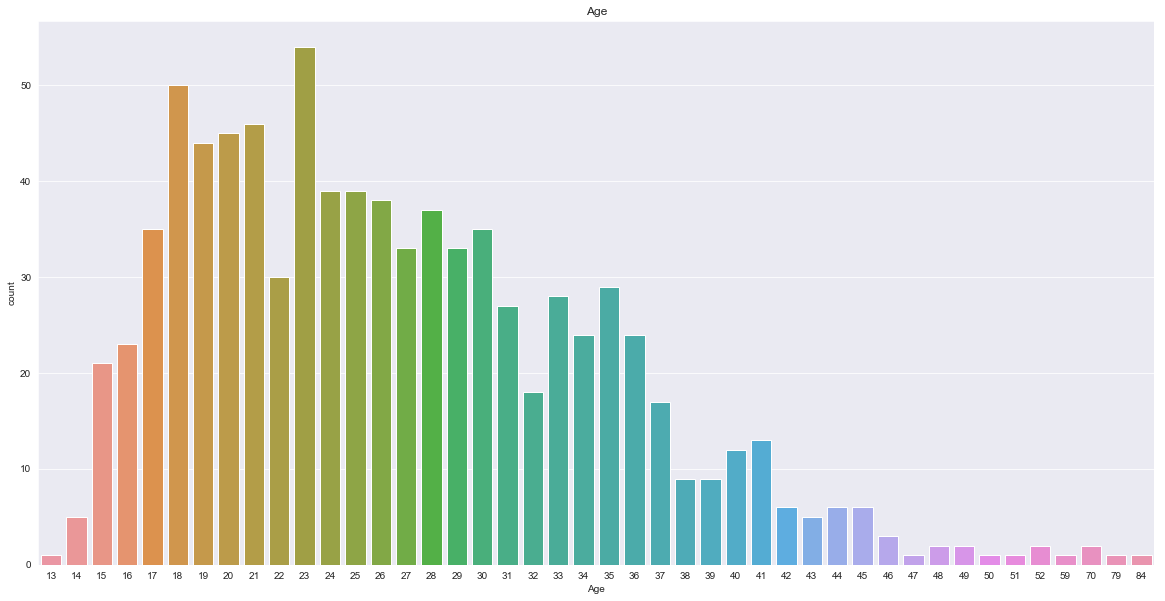

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64
************************************************


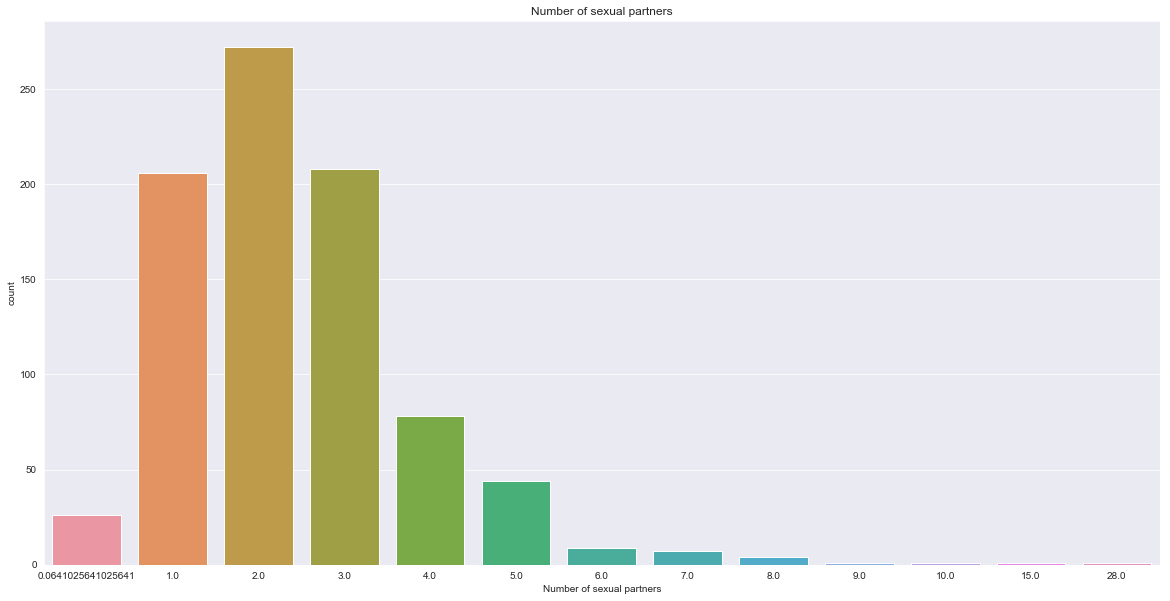

count    858.000000
mean       2.452991
std        1.695755
min        0.064103
25%        1.000000
50%        2.000000
75%        3.000000
max       28.000000
Name: Number of sexual partners, dtype: float64
************************************************


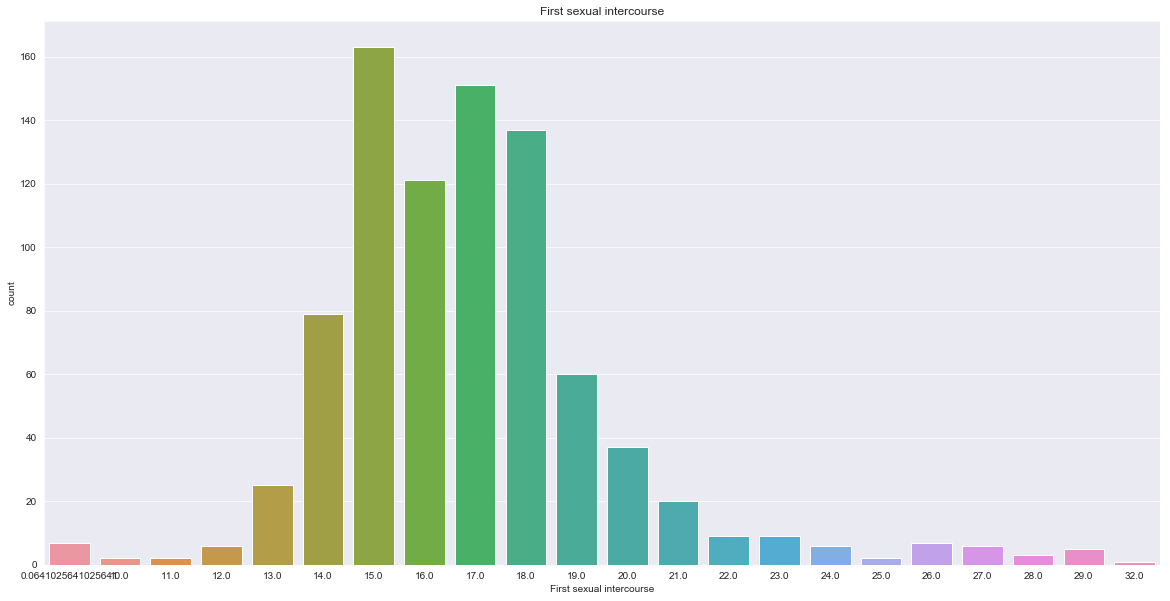

count    858.000000
mean      16.857166
std        3.180723
min        0.064103
25%       15.000000
50%       17.000000
75%       18.000000
max       32.000000
Name: First sexual intercourse, dtype: float64
************************************************


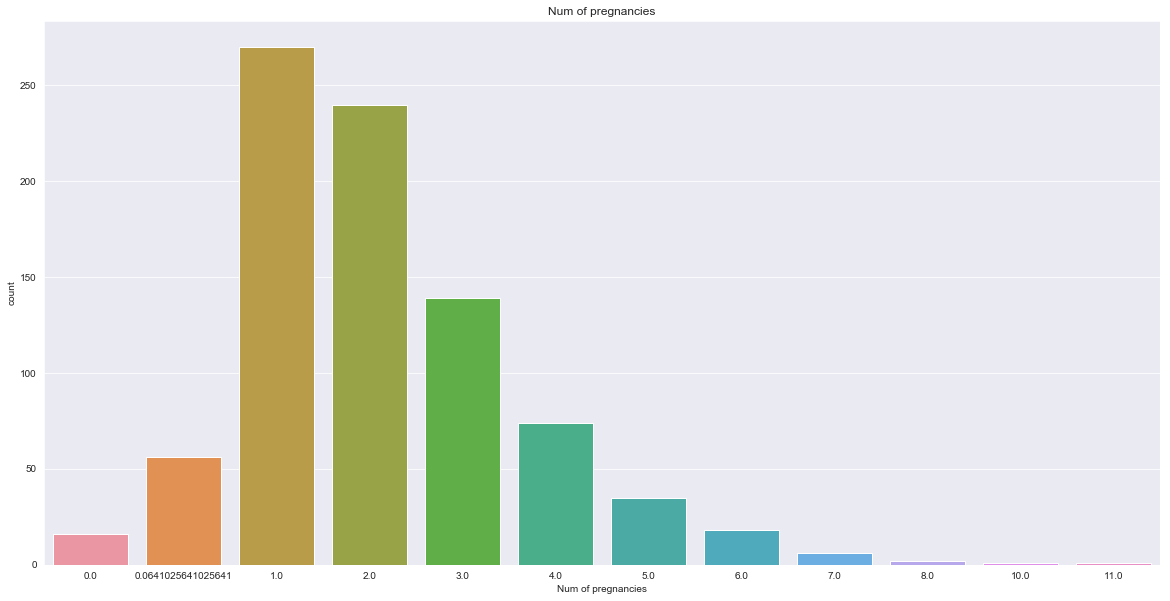

count    858.000000
mean       2.131223
std        1.502272
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Num of pregnancies, dtype: float64
************************************************


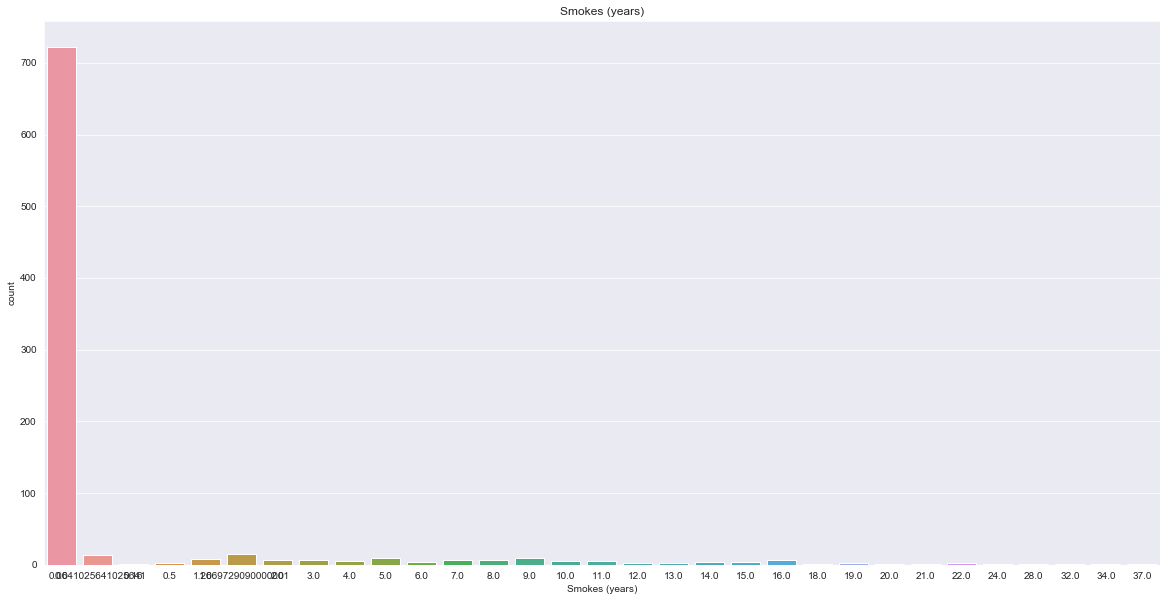

count    858.000000
mean       1.202212
std        4.060342
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (years), dtype: float64
************************************************


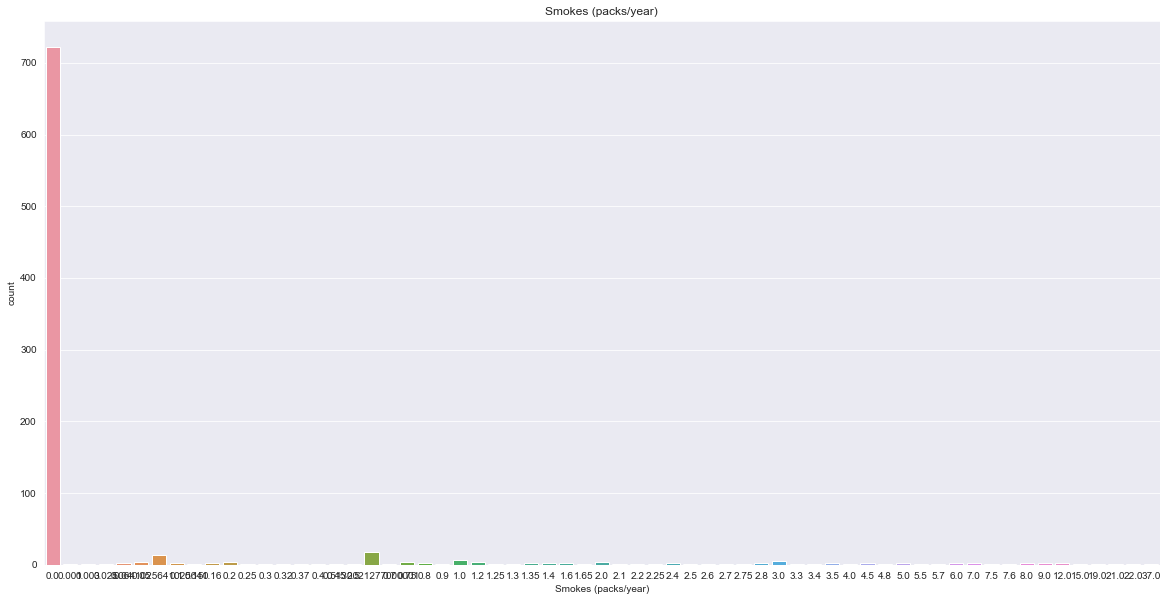

count    858.000000
mean       0.447249
std        2.210169
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (packs/year), dtype: float64
************************************************


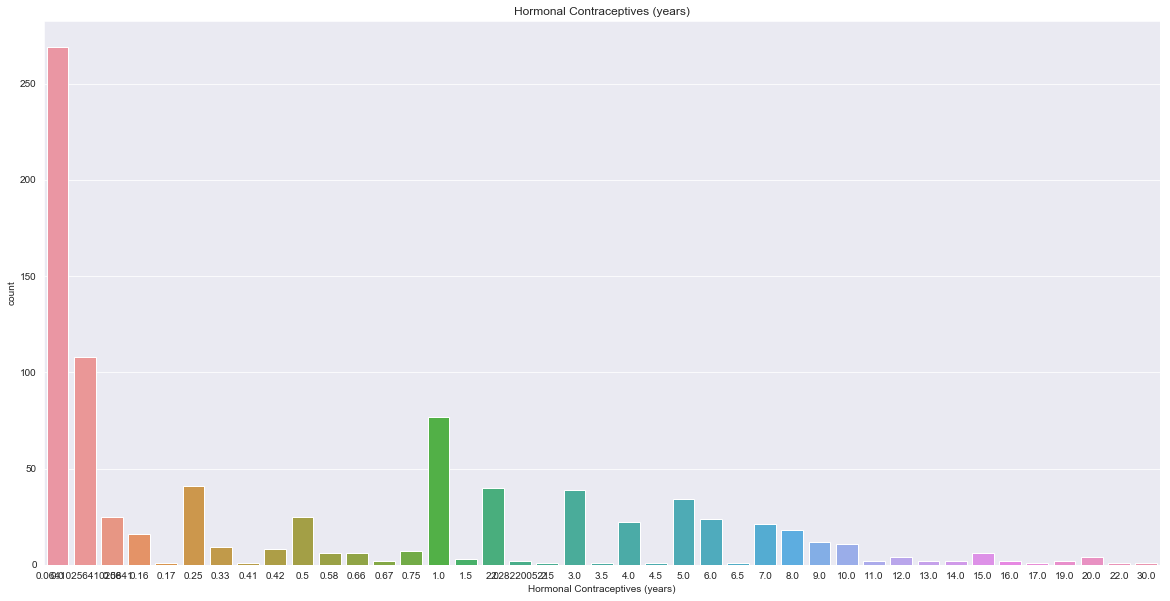

count    858.000000
mean       1.980463
std        3.593520
min        0.000000
25%        0.000000
50%        0.250000
75%        2.000000
max       30.000000
Name: Hormonal Contraceptives (years), dtype: float64
************************************************


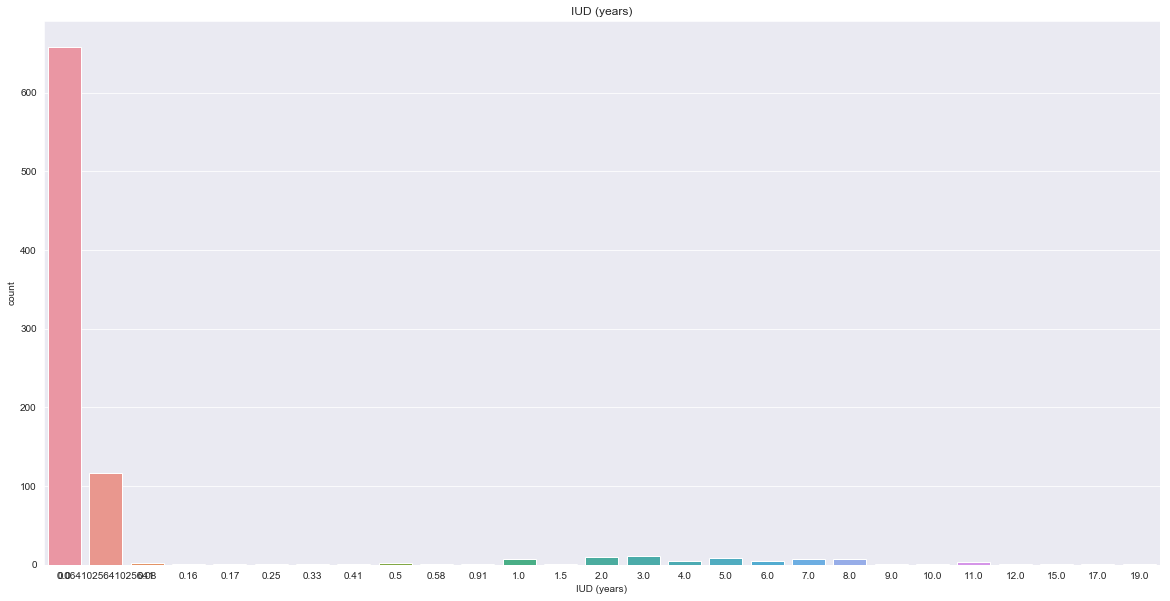

count    858.000000
mean       0.453345
std        1.812206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       19.000000
Name: IUD (years), dtype: float64
************************************************


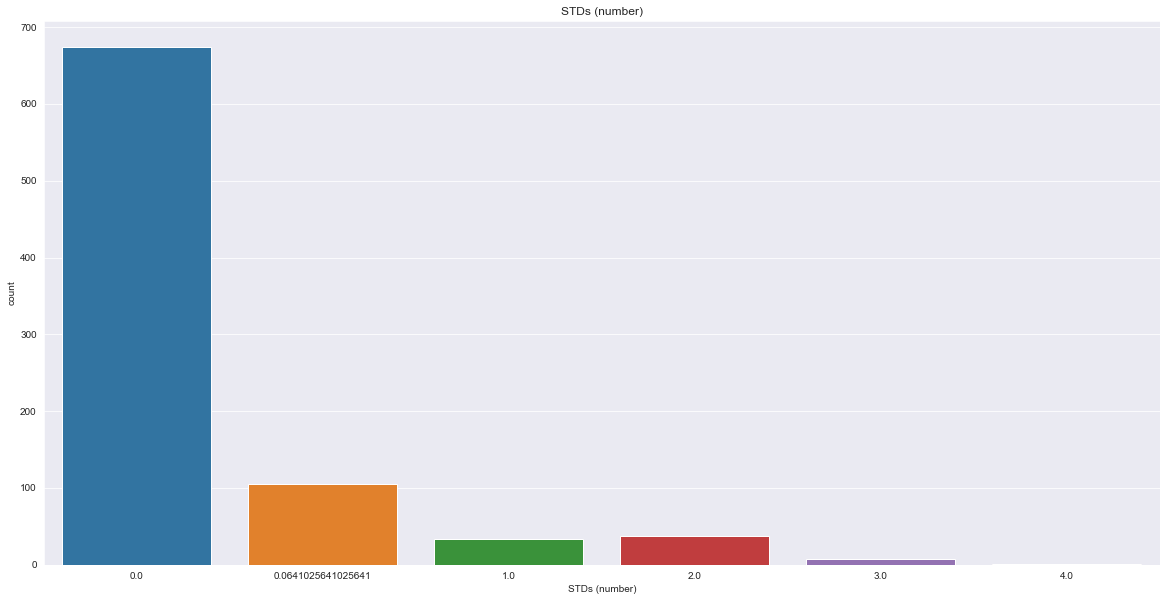

count    858.000000
mean       0.162856
std        0.527732
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: STDs (number), dtype: float64
************************************************


In [192]:
for col in continuous_cols:
    fig = plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=df2)
    plt.title(col)
    plt.show()
    print(df2[col].describe())
    print('************************************************')

In [193]:
df2.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,Dx:HPV_0.0,Dx:HPV_1.0,Dx_0.0,Dx_1.0,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.452991,16.857166,2.131223,1.202212,0.447249,1.980463,0.453345,0.162856,0.087413,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.913753,0.086247,0.948718,0.051282
std,8.497948,1.695755,3.180723,1.502272,4.060342,2.210169,3.593520,1.812206,0.527732,0.302545,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.280892,0.280892,0.220701,0.220701
min,13.000000,0.064103,0.064103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
# create X and y
X = df2.drop('Biopsy', axis=1)
y = df2['Biopsy']



In [195]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,Dx:HPV_0.0,Dx:HPV_1.0,Dx_0.0,Dx_1.0,Hinselmann_0.0,Hinselmann_1.0,Schiller_0.0,Schiller_1.0,Citology_0.0,Citology_1.0
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,1,0,1,0,1,0,1,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,1,0,1,0,1,0,1,0
2,34,1.0,0.064103,1.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,1,0,1,0,1,0,1,0
3,52,5.0,16.000000,4.0,37.0,37.0,3.0,0.0,0.0,0,...,0,1,1,0,1,0,1,0,1,0
4,46,3.0,21.000000,4.0,0.0,0.0,15.0,0.0,0.0,0,...,1,0,1,0,1,0,1,0,1,0


In [196]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Biopsy, dtype: int64

In [197]:
# create 80/20 train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)


In [198]:
# standardize the continuous factors

from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.fit_transform(X_test)



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [202]:
X_train_scaled.shape

(686, 90)

In [203]:
X_test_scaled.shape

(172, 90)

In [204]:
X = X_train_scaled
y = y_train

Feature ranking:
1. feature 39 (0.104744)
2. feature 86 (0.089054)
3. feature 87 (0.081760)
4. feature 38 (0.074656)
5. feature 0 (0.062189)
6. feature 2 (0.049553)
7. feature 84 (0.043962)
8. feature 37 (0.041269)
9. feature 1 (0.040465)
10. feature 85 (0.040190)
11. feature 6 (0.036585)
12. feature 3 (0.034089)
13. feature 36 (0.026104)
14. feature 41 (0.021150)
15. feature 88 (0.019704)
16. feature 40 (0.018820)
17. feature 89 (0.014864)
18. feature 22 (0.014629)
19. feature 20 (0.013853)
20. feature 60 (0.012209)
21. feature 23 (0.011308)
22. feature 19 (0.011113)
23. feature 59 (0.007506)
24. feature 16 (0.007155)
25. feature 5 (0.007115)
26. feature 7 (0.006202)
27. feature 15 (0.006079)
28. feature 14 (0.005842)
29. feature 4 (0.005737)
30. feature 53 (0.005349)
31. feature 9 (0.005040)
32. feature 17 (0.004846)
33. feature 54 (0.004623)
34. feature 31 (0.004366)
35. feature 26 (0.004092)
36. feature 78 (0.003922)
37. feature 25 (0.003746)
38. feature 30 (0.003666)
39. feature 8

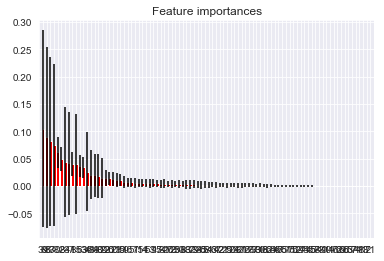

In [205]:
# test using random forest to determine feature importance
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()